In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Dataset
df=pd.read_csv('gas_turbines.csv')
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [4]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [5]:
df.duplicated().sum()

0

## Visualization

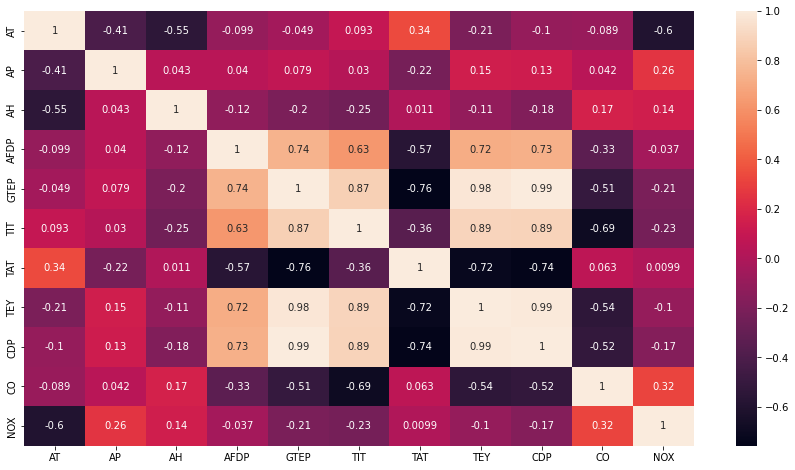

In [6]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TEY', ylabel='count'>

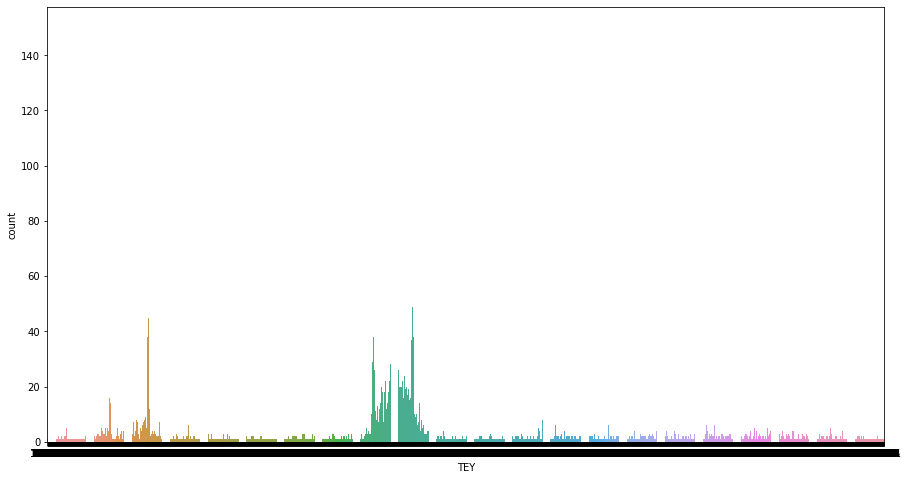

In [10]:
plt.figure(figsize=(15,8))
sns.countplot(df['TEY'])

<AxesSubplot:xlabel='TEY', ylabel='Count'>

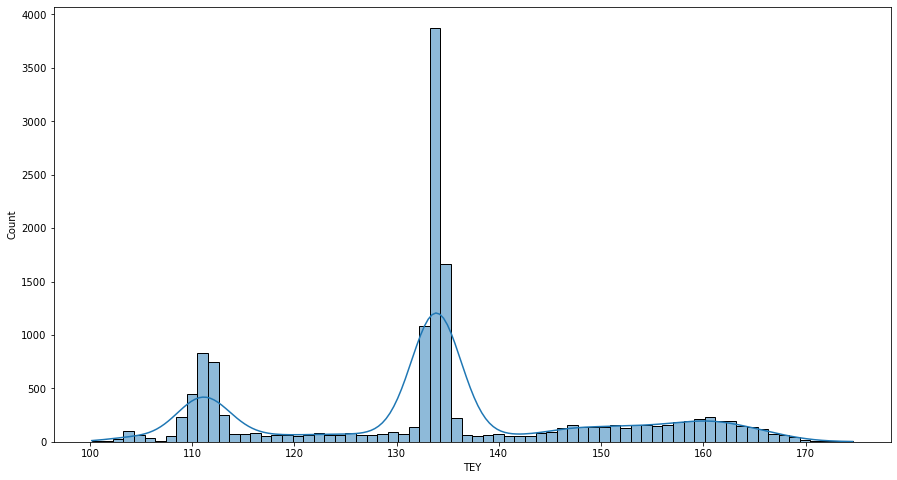

In [46]:
plt.figure(figsize=(15,8))
sns.histplot(df['TEY'],kde=True)

<Figure size 1080x576 with 0 Axes>

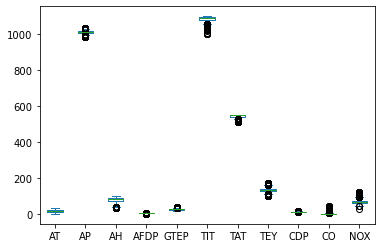

In [47]:
plt.figure(figsize=(15,8))
df.plot(kind='box')
plt.show()

In [23]:
#Encoding
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x)

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

# Model Building

In [20]:
x=pd.concat([df.iloc[:,0:7],df.iloc[:,8:]],axis=1).values
y=df['TEY'].values

In [21]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
ann=Sequential()
ann.add(Dense(units=6,activation='relu'))
ann.add(Dense(units=6,activation='relu'))
ann.add(Dense(units=1))

In [27]:
ann.compile(optimizer='adam',loss='mean_squared_error')

In [29]:
ann.fit(x=xtrain,y=ytrain,epochs=100,batch_size=32,validation_data=(xtest,ytest),callbacks=EarlyStopping(monitor='val_loss',patience=4))

Epoch 1/100
353/353 [==============================] - 8s 9ms/step - loss: 193.2097 - val_loss: 184.6658
Epoch 2/100
353/353 [==============================] - 2s 6ms/step - loss: 168.7525 - val_loss: 162.5951
Epoch 3/100
353/353 [==============================] - 2s 5ms/step - loss: 145.6816 - val_loss: 131.2615
Epoch 4/100
353/353 [==============================] - 2s 6ms/step - loss: 116.8580 - val_loss: 101.3663
Epoch 5/100
353/353 [==============================] - 2s 4ms/step - loss: 86.1466 - val_loss: 71.8272
Epoch 6/100
353/353 [==============================] - 2s 5ms/step - loss: 56.6771 - val_loss: 44.1633
Epoch 7/100
353/353 [==============================] - 2s 5ms/step - loss: 35.6102 - val_loss: 29.0950
Epoch 8/100
353/353 [==============================] - 1s 4ms/step - loss: 25.3037 - val_loss: 24.1448
Epoch 9/100
353/353 [==============================] - 1s 4ms/step - loss: 21.0825 - val_loss: 20.1635
Epoch 10/100
353/353 [==============================] - 1s 4ms/st

Epoch 81/100
353/353 [==============================] - 2s 4ms/step - loss: 2.3234 - val_loss: 2.4449
Epoch 82/100
353/353 [==============================] - 1s 4ms/step - loss: 2.2596 - val_loss: 2.0637
Epoch 83/100
353/353 [==============================] - 1s 4ms/step - loss: 2.1599 - val_loss: 2.3677
Epoch 84/100
353/353 [==============================] - 1s 4ms/step - loss: 2.1841 - val_loss: 1.9664
Epoch 85/100
353/353 [==============================] - 1s 4ms/step - loss: 2.0901 - val_loss: 2.0362
Epoch 86/100
353/353 [==============================] - 1s 4ms/step - loss: 2.0433 - val_loss: 1.9610
Epoch 87/100
353/353 [==============================] - 1s 4ms/step - loss: 2.1065 - val_loss: 1.9814
Epoch 88/100
353/353 [==============================] - 1s 4ms/step - loss: 2.0240 - val_loss: 1.9321
Epoch 89/100
353/353 [==============================] - 2s 4ms/step - loss: 1.9393 - val_loss: 1.8162
Epoch 90/100
353/353 [==============================] - 2s 4ms/step - loss: 1.9431

In [30]:
pd.DataFrame(ann.history.history)

,loss,val_loss
0,193.209747,184.665848
1,168.752533,162.595062
2,145.681625,131.261475
3,116.857979,101.366318
4,86.146606,71.827232
...,...,...
89,1.943085,1.776008
90,1.859009,2.038448
91,1.898323,2.935694
92,1.947842,1.891155


In [31]:
ann.evaluate(xtrain,ytrain)

353/353 [==============================] - 5s 3ms/step - loss: 2.0132


2.0132486820220947

In [32]:
ann.evaluate(xtest,ytest)

118/118 [==============================] - 0s 2ms/step - loss: 2.0162


2.0162105560302734

In [39]:
predictions=ann.predict(xtest)
predictions_df=pd.DataFrame(np.ravel(predictions),columns=['predictions'])
comparison_df=pd.concat([pd.DataFrame(ytest,columns=['Real values']),predictions_df],axis=1)
comparison_df

118/118 [==============================] - 0s 2ms/step


,Real values,predictions
0,134.46,134.655991
1,111.88,113.876312
2,133.72,133.814102
3,133.79,134.179733
4,110.77,112.848854
...,...,...
3755,133.67,133.120224
3756,112.87,115.153908
3757,131.94,132.739136
3758,148.88,149.972351


In [40]:
print(ytest.shape)
print(predictions.shape)

(3760,)
(3760, 1)


In [42]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(ytest,predictions))
print('MSE:',metrics.mean_squared_error(ytest,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(ytest,predictions)))

MAE: 1.0581407765327615
MSE: 2.016210777321912
RMSE: 1.419933370733258


In [43]:
metrics.explained_variance_score(ytest,predictions)

0.9933652528316733